# 1.Creating Model

In [14]:
from keras import layers
from keras.models import Sequential

In [15]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Flatten())

model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

# 2.Compiling Model

In [17]:
from tensorflow.keras import optimizers

model.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(learning_rate = 1e-4), #ogrenme orani
              metrics = ["acc"]
              )

# 3.Data Generation

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_directory = "datasets/catdog/train"
validation_directory = "datasets/catdog/validation"

In [20]:
train_generator = train_datagen.flow_from_directory(train_directory,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = "binary"
                                                    )

validation_generator = train_datagen.flow_from_directory(validation_directory,
                                                        target_size = (150,150),
                                                        batch_size = 20,
                                                        class_mode = "binary"
                                                    )

Found 8005 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.


# 4.Training

In [22]:
history = model.fit(train_generator,
                              epochs = 20,
                              validation_data = validation_generator,
                              validation_steps = 50
                              )

Epoch 1/20


/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


401/401 ━━━━━━━━━━━━━━━━━━━━ 123s 305ms/step - acc: 0.5441 - loss: 0.6845 - val_acc: 0.6920 - val_loss: 0.6139
Epoch 2/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 130s 324ms/step - acc: 0.6582 - loss: 0.6189 - val_acc: 0.6960 - val_loss: 0.5840
Epoch 3/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 126s 315ms/step - acc: 0.6929 - loss: 0.5686 - val_acc: 0.7710 - val_loss: 0.5159
Epoch 4/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 122s 304ms/step - acc: 0.7324 - loss: 0.5228 - val_acc: 0.7730 - val_loss: 0.4980
Epoch 5/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 123s 306ms/step - acc: 0.7712 - loss: 0.4688 - val_acc: 0.7390 - val_loss: 0.5134
Epoch 6/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 120s 298ms/step - acc: 0.7832 - loss: 0.4555 - val_acc: 0.7200 - val_loss: 0.5328
Epoch 7/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 126s 315ms/step - acc: 0.8088 - loss: 0.4176 - val_acc: 0.8140 - val_loss: 0.4361
Epoch 8/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 119s 296ms/step - acc: 0.8207 - loss: 0.4010 - val_acc: 0.7880 - val_loss: 0.4494
Epoch 9/20
401/401 ━━━━━━━━━━━━━━━━

# 5.Visualization

In [28]:
plt.style.available 

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

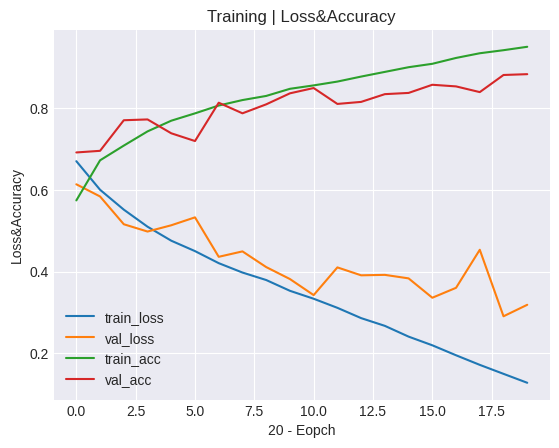

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-v0_8-darkgrid")
plt.figure()

epochs = 20

plt.plot(np.arange(0,epochs), history.history["loss"],label="train_loss")
plt.plot(np.arange(0,epochs), history.history["val_loss"],label="val_loss")

plt.plot(np.arange(0,epochs), history.history["acc"],label="train_acc")
plt.plot(np.arange(0,epochs), history.history["val_acc"],label="val_acc")

plt.title("Training | Loss&Accuracy")
plt.xlabel("20 - Eopch")
plt.ylabel("Loss&Accuracy")
plt.legend(loc="lower left") #labelların gösterilecegi konumunu belirleme


# PROBLEM: OVERFITTING
1. New Model
2. Data Augmentation

# Creating New Model

In [29]:
model_x = Sequential()

model_x.add(layers.Conv2D(32, (3,3), activation="relu", input_shape = (150,150,3)))
model_x.add(layers.MaxPooling2D((2,2)))

model_x.add(layers.Conv2D(64, (3,3), activation="relu"))
model_x.add(layers.MaxPooling2D((2,2)))

model_x.add(layers.Conv2D(128, (3,3), activation="relu"))
model_x.add(layers.MaxPooling2D((2,2)))

model_x.add(layers.Conv2D(128, (3,3), activation="relu"))
model_x.add(layers.MaxPooling2D((2,2)))


model_x.add(layers.Flatten())
model_x.add(layers.Dropout(0.4))

model_x.add(layers.Dense(512,activation="relu"))
model_x.add(layers.Dense(1,activation="sigmoid"))

model_x.summary()

/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model_x.compile(loss = "binary_crossentropy",
                optimizer = optimizers.RMSprop(learning_rate = 1e-4), #ogrenme orani
                metrics = ["acc"]
              )

# Image Data Augmentation

In [32]:
train_datagen_x = ImageDataGenerator(rescale = 1./255,
                                    rotation_range = 45,
                                    width_shift_range = 0.3,
                                    height_shift_range = 0.3,
                                    shear_range = 0.3,
                                    zoom_range = 0.3,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    fill_mode = "nearest")

validation_datagen_x = ImageDataGenerator(rescale = 1./255,)

In [33]:
train_generator_x = train_datagen_x.flow_from_directory(train_directory,
                                                        target_size = (150,150),
                                                        batch_size = 16,
                                                        class_mode = "binary")

validation_generator_x = validation_datagen_x.flow_from_directory(train_directory,
                                                                  target_size = (150,150),
                                                                  batch_size = 16,
                                                                  class_mode = "binary")

Found 8005 images belonging to 2 classes.
Found 8005 images belonging to 2 classes.


In [34]:
history_x = model_x.fit(train_generator_x,
                        epochs = 100,
                        validation_data = validation_generator_x,
                        validation_steps = 50)

Epoch 1/100


/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


501/501 ━━━━━━━━━━━━━━━━━━━━ 117s 230ms/step - acc: 0.5178 - loss: 0.6927 - val_acc: 0.5437 - val_loss: 0.6839
Epoch 2/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 90s 179ms/step - acc: 0.5842 - loss: 0.6696 - val_acc: 0.5850 - val_loss: 0.6788
Epoch 3/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 100s 199ms/step - acc: 0.6056 - loss: 0.6518 - val_acc: 0.6438 - val_loss: 0.6358
Epoch 4/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 125s 248ms/step - acc: 0.6257 - loss: 0.6421 - val_acc: 0.6350 - val_loss: 0.6161
Epoch 5/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 115s 228ms/step - acc: 0.6203 - loss: 0.6414 - val_acc: 0.6012 - val_loss: 0.6375
Epoch 6/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 124s 245ms/step - acc: 0.6307 - loss: 0.6364 - val_acc: 0.7225 - val_loss: 0.5658
Epoch 7/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 123s 245ms/step - acc: 0.6524 - loss: 0.6230 - val_acc: 0.7013 - val_loss: 0.5647
Epoch 8/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 101s 200ms/step - acc: 0.6549 - loss: 0.6177 - val_acc: 0.6913 - val_loss: 0.5612
Epoch 9/100
501/501 ━━━━━━━━━

2024-10-07 16:35:10.443291: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


501/501 ━━━━━━━━━━━━━━━━━━━━ 91s 180ms/step - acc: 0.6825 - loss: 0.5866 - val_acc: 0.7225 - val_loss: 0.5286
Epoch 13/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 91s 180ms/step - acc: 0.6944 - loss: 0.5824 - val_acc: 0.6888 - val_loss: 0.6102
Epoch 14/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 91s 180ms/step - acc: 0.6978 - loss: 0.5806 - val_acc: 0.7325 - val_loss: 0.5240
Epoch 15/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 91s 180ms/step - acc: 0.6891 - loss: 0.5805 - val_acc: 0.7113 - val_loss: 0.5486
Epoch 16/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 91s 180ms/step - acc: 0.7042 - loss: 0.5654 - val_acc: 0.7625 - val_loss: 0.4926
Epoch 17/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 91s 180ms/step - acc: 0.7096 - loss: 0.5625 - val_acc: 0.7788 - val_loss: 0.4740
Epoch 18/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 91s 180ms/step - acc: 0.7095 - loss: 0.5589 - val_acc: 0.7250 - val_loss: 0.5589
Epoch 19/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 91s 180ms/step - acc: 0.7099 - loss: 0.5598 - val_acc: 0.7100 - val_loss: 0.5573
Epoch 20/100
501/501 ━━━━━━━━

2024-10-07 16:51:46.967399: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


501/501 ━━━━━━━━━━━━━━━━━━━━ 91s 180ms/step - acc: 0.7126 - loss: 0.5540 - val_acc: 0.7700 - val_loss: 0.4931
Epoch 24/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 90s 179ms/step - acc: 0.7311 - loss: 0.5357 - val_acc: 0.7013 - val_loss: 0.6274
Epoch 25/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 91s 180ms/step - acc: 0.7333 - loss: 0.5410 - val_acc: 0.7713 - val_loss: 0.4789
Epoch 26/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 90s 179ms/step - acc: 0.7279 - loss: 0.5347 - val_acc: 0.7812 - val_loss: 0.4699
Epoch 27/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 90s 179ms/step - acc: 0.7287 - loss: 0.5340 - val_acc: 0.7525 - val_loss: 0.5438
Epoch 28/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 91s 180ms/step - acc: 0.7380 - loss: 0.5231 - val_acc: 0.7487 - val_loss: 0.5229
Epoch 29/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 90s 179ms/step - acc: 0.7306 - loss: 0.5245 - val_acc: 0.7563 - val_loss: 0.5071
Epoch 30/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 90s 179ms/step - acc: 0.7494 - loss: 0.5168 - val_acc: 0.7513 - val_loss: 0.4857
Epoch 31/100
501/501 ━━━━━━━━

2024-10-07 17:24:57.190084: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


501/501 ━━━━━━━━━━━━━━━━━━━━ 91s 180ms/step - acc: 0.7702 - loss: 0.4755 - val_acc: 0.7675 - val_loss: 0.5097
Epoch 46/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 90s 179ms/step - acc: 0.7691 - loss: 0.4771 - val_acc: 0.8087 - val_loss: 0.4301
Epoch 47/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 91s 180ms/step - acc: 0.7718 - loss: 0.4764 - val_acc: 0.8125 - val_loss: 0.4006
Epoch 48/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 91s 180ms/step - acc: 0.7767 - loss: 0.4634 - val_acc: 0.8012 - val_loss: 0.4784
Epoch 49/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 90s 179ms/step - acc: 0.7669 - loss: 0.4827 - val_acc: 0.8175 - val_loss: 0.4009
Epoch 50/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 90s 179ms/step - acc: 0.7755 - loss: 0.4780 - val_acc: 0.7837 - val_loss: 0.4538
Epoch 51/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 90s 179ms/step - acc: 0.7843 - loss: 0.4557 - val_acc: 0.7725 - val_loss: 0.4915
Epoch 52/100
501/501 ━━━━━━━━━━━━━━━━━━━━ 91s 180ms/step - acc: 0.7741 - loss: 0.4675 - val_acc: 0.8238 - val_loss: 0.3936
Epoch 53/100
501/501 ━━━━━━━━